In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy

from dataloaders import *
from util import Config
from viz_utils import *

In [13]:
datasets = ["MRPC", "TREC-2", "SUBJ", "AGN-2", "TREC-6", "AGN-4", "SST"]
dataset_map = {
    "TREC-2": "TREC-2",
    "SUBJ": "SUBJ",
    "AGN-2": "AGN-2",
    "TREC-6": "TREC-full",
    "SST": "SST",
    "COLA": "COLA",
    "AGN-4": "ag_news-full",
}
models = ["BERT", "ELECTRA"]
load_anti = False
n = 0  # AL step at which evaluation (AUC) starts
model = "BERT"
mode = "ada"
dataset = "SUBJ"

aucs = []
trs = []
for tapta in [False]:
    for adapter in ["fft", "unipelt", "lora", "prefix", "houlsby"]:
        try:
            experiments, meta = load_results_multiple(
                base_dir=f"results/exp1/storage",
                dataset=dataset,
                model=model,
                adapter=adapter,
                tapta=tapta,
            )
        except:
            print(f"No experiments for {dataset}-{model}-{mode}")
        for load_mode in ["last", "best"]:
            mode_print = mode if load_mode == "last" else f"{mode}-besov"
            print(f"Loading {dataset} -- {mode_print} -- {model}")
            df_tr_i = results_to_df(experiments, mode=load_mode)

            df_tr_i["model"] = meta["model"] + "-" + adapter + ("-TAPTA" if tapta else "")
            print(meta)
            df_tr_i["mode"] = mode_print
            df_tr_i["dataset"] = dataset
            df_tr_i = df_tr_i.reset_index().set_index(
                ["dataset", "model", "mode", "sampler", "experiment", "al_iter"]
            )
            trs.append(df_tr_i)

            df_auc_i = al_auc(df_tr_i)
            df_auc_i["mode"] = mode_print
            df_auc_i = df_auc_i.reset_index().set_index(["mode", "sampler"])
            aucs.append(df_auc_i)


    # plot_besov_index(df_tr, ci=0)
    # plot_al_accuracy(df_tr, metric="f1_micro", ci=0)
    df_tr = pd.concat(trs)
    df_auc = pd.concat(aucs)

SUBJ-BERT
Loading SUBJ -- ada -- BERT
{'dataset': 'SUBJ', 'model': 'BERT', 'warm_start_size': 100, 'query_size': 50, 'batch_size': 32, 'epochs_per_train': 15, 'seeds': [1, 2, 3, 4, 5], 'prop_easy': 1.0, 'prop_amb': 1.0, 'prop_hard': 1.0, 'pvi_threshold': None, 'lr': 2e-05, 'l2': 1e-05}
Loading SUBJ -- ada-besov -- BERT
{'dataset': 'SUBJ', 'model': 'BERT', 'warm_start_size': 100, 'query_size': 50, 'batch_size': 32, 'epochs_per_train': 15, 'seeds': [1, 2, 3, 4, 5], 'prop_easy': 1.0, 'prop_amb': 1.0, 'prop_hard': 1.0, 'pvi_threshold': None, 'lr': 2e-05, 'l2': 1e-05}
SUBJ-BERT
Loading SUBJ -- ada -- BERT
{'dataset': 'SUBJ', 'model': 'BERT', 'warm_start_size': 100, 'query_size': 50, 'batch_size': 32, 'epochs_per_train': 50, 'seeds': [1, 2, 3, 4, 5], 'lr': 0.0001, 'l2': 1e-05, 'time': 144057.656242}
Loading SUBJ -- ada-besov -- BERT
{'dataset': 'SUBJ', 'model': 'BERT', 'warm_start_size': 100, 'query_size': 50, 'batch_size': 32, 'epochs_per_train': 50, 'seeds': [1, 2, 3, 4, 5], 'lr': 0.0001, 

In [15]:
df_tr

labeled  \
dataset model        mode      sampler experiment al_iter            
SUBJ    BERT-fft     ada       random  0          0            100   
                                                  1            150   
                                                  2            200   
                                                  3            250   
                                                  4            300   
...                                                            ...   
        BERT-houlsby ada-besov random  4          14           800   
                                                  15           850   
                                                  16           900   
                                                  17           950   
                                                  18          1000   

                                                           train_loss  \
dataset model        mode      sampler experiment al_iter               
SUBJ    BERT-fft     ada       random  0          0          0.054779   
                                                  1          0.009007   
                                                  2          0.004535   
                                                  3          0.003670   
                                                  4          0.001834   
...                                                               ...   
        BERT-houlsby ada-besov random  4          14         0.007389   
                                                  15         0.019635   
                                                  16         0.058165   
                                                  17         0.057445   
                                                  18         0.123223   

                                                           test_accuracy  \
dataset model        mode      sampler experiment al_iter                  
SUBJ    BERT-fft     ada       random  0          0               0.8895   
                                                  1               0.9125   
                                                  2               0.8870   
                                                  3               0.9100   
                                                  4               0.9170   
...                                                                  ...   
        BERT-houlsby ada-besov random  4          14              0.9380   
                                                  15              0.9415   
                                                  16              0.9380   
                                                  17              0.9410   
                                                  18              0.9400   

                                                           f1_micro  f1_macro  \
dataset model        mode      sampler experiment al_iter                       
SUBJ    BERT-fft     ada       random  0          0          0.8895  0.889206   
                                                  1          0.9125  0.912490   
                                                  2          0.8870  0.885616   
                                                  3          0.9100  0.910000   
                                                  4          0.9170  0.916880   
...                                                             ...       ...   
        BERT-houlsby ada-besov random  4          14         0.9380  0.937980   
                                                  15         0.9415  0.941478   
                                                  16         0.9380  0.937961   
                                                  17         0.9410  0.940988   
                                                  18         0.9400  0.939991   

                                                                                                    selected  
dataset model        mode      sampler exper

Text(0.5, 1.0, 'SUBJ')

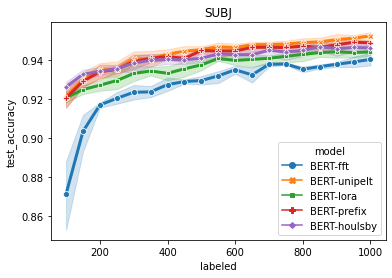

In [16]:
g = sns.lineplot(
    data=df_tr[df_tr.index.get_level_values("mode") == "ada-besov"],
    x="labeled",
    y="test_accuracy",
    hue="model",
    style="model",
    markers=True,
    dashes=False,
    ci=90,
    linewidth=3,
)
plt.title("SUBJ")
# plt.legend(loc='lower right')
# g.set_ylim(0.75, 0.94)
# g.set_xlim(300, 1000)

(100.0, 1000.0)

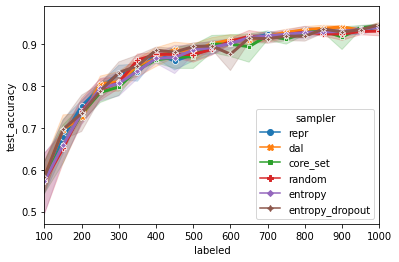

In [64]:
g = sns.lineplot(
    data=df_tr[df_tr.index.get_level_values("mode") == "ada-besov"],
    x="labeled",
    y="test_accuracy",
    hue="sampler",
    style="sampler",
    markers=True,
    dashes=False,
    ci=90,
    linewidth=3,
)
# plt.legend(loc='lower right')
# g.set_ylim(0.94, 0.985)
# g.set_xlim(150, 500)
g.set_xlim(100, 1000)

In [22]:
df_tr.groupby(["dataset", "model", "model", "sampler", "experiment"]).agg(list)

labeled  \
dataset model model sampler experiment                                                      
SUBJ    BERT  BERT  entropy 0           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                            1           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                            2           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                            3           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                            4           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                    random  0           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                            1           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                            2           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                            3           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                            4           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   

                                                                               train_loss  \
dataset model model sampler experiment                                                      
SUBJ    BERT  BERT  entropy 0           [0.015600163460476324, 0.012404336314648389, 0...   
                            1           [0.0058130395409534685, 0.03375287461094558, 0...   
                            2           [0.004151124652707949, 0.02196246958337724, 0....   
                            3           [0.0025166915147565305, 0.020827480452135207, ...   
                            4           [0.0027115744160255417, 0.011673131631687284, ...   
                    random  0           [0.015600163460476324, 0.0035440850304439666, ...   
                            1           [0.0058130395409534685, 0.0011495442362502218,...   
                            2           [0.004151124652707949, 0.014242950198240577, 0...   
                            3           [0.0025166915147565305, 0.003502957301679999, ...   
                            4           [0.0027115744160255417, 0.0018485110718756913,...   

                                                                            test_accuracy  \
dataset model model sampler experiment                                                      
SUBJ    BERT  BERT  entropy 0           [0.9035, 0.915, 0.9135, 0.9345, 0.931, 0.934, ...   
                            1           [0.9195, 0.9295, 0.9365, 0.9385, 0.944, 0.942,...   
                            2           [0.916, 0.933, 0.936, 0.937, 0.9335, 0.943, 0....   
                            3           [0.911, 0.9355, 0.9355, 0.948, 0.943, 0.941, 0...   
                            4           [0.906, 0.9365, 0.9305, 0.936, 0.9465, 0.937, ...   
                    random  0           [0.9035, 0.892, 0.8925, 0.917, 0.9145, 0.9325,...   
                            1           [0.9195, 0.9125, 0.927, 0.937, 0.9235, 0.9375,...   
                            2           [0.916, 0.9275, 0.9145, 0.919, 0.933, 0.9295, ...   
                            3           [0.911, 0.92, 0.928, 0.9185, 0.9335, 0.9315, 0...   
                            4           [0.906, 0.9105, 0.911, 0.922, 0.9195, 0.925, 0...   

                                                                                 f1_micro  \
dataset model model sampler experiment                                                      
SUBJ    BERT  BERT  entropy 0           [0.9035, 0.915, 0.9135, 0.9345, 0.931, 0.934, ...   
                            1           [0.9195, 0.9295, 0.9365, 0.9385, 0.944, 0.942,...   
                            2           [0.916, 0.933, 0.936, 0.937, 0.9335, 0.943, 0....   
                            3           [0.911, 0.9355, 0.9355, 0.948, 0.943, 0.941, 0...   
                            4           [0.906, 0.9365, 0.9305, 0.936, 0.9465, 0.937, ...   
                    random  0           [0.9035, 0.892, 0.8925, 0.917, 0.9145, 0

In [ ]:
df_tr.groupby(["dataset", "model", "model", "sampler", "experiment"]).agg(list)
    

In [30]:
from models import *
from args import *
from dataloaders import *

args = Config()
args.lr = 1e-4
args.l2 = 0
args.model = "BERT"
args.data = "TREC-6"
args.adapter = "unipelt"
args.batch_size = 32
args.epochs = 10
args.clip = 1

meta = Config()

dataloader = dataset_loaders[args.data]
tokenizer = AutoTokenizer.from_pretrained(TRANSFORMERS[args.model])
(train, val, test) = dataloader(meta=meta, tokenizer=tokenizer)

if args.data in pair_sequence_datasets:
    meta.pair_sequence = True
else:
    meta.pair_sequence = False
    
meta.task_type = "clf"

if meta.num_labels == 2:
    # Binary classification
    criterion = nn.BCEWithLogitsLoss()
    meta.num_targets = 1
else:
    # Multiclass classification
    criterion = nn.CrossEntropyLoss()
    meta.num_targets = meta.num_labels
    
model = Transformer2(args, meta, args.model, pretrained=None, adapter=args.adapter)
optimizer = torch.optim.AdamW(model.parameters(), lr=args.lr, weight_decay=args.l2)
device = torch.device("cuda:1")



model.to(device)
train_iter = make_iterable(
    train,
    device,
    batch_size=args.batch_size,
    shuffle=True,
#     indices=indices
)

In [31]:
test_iter = make_iterable(
    test,
    device,
    batch_size=args.batch_size,
)

In [14]:
from util import logits_to_probs
from sklearn.metrics import f1_score

In [23]:
import time
from al.experiment import Experiment


def train_model(model, optimizer, criterion, train_iter):
    model.train()

    total_loss = 0.0
    accuracy, confusion_matrix = 0, np.zeros(
        (meta.num_labels, meta.num_labels), dtype=int
    )

    logit_list = []
    y_true_list = []
    ids = []
    for batch_num, batch in enumerate(train_iter, 1):
        t = time.time()

        optimizer.zero_grad()

        ids.extend([id for id in batch.id])

        # Unpack batch & cast to device
        if meta.pair_sequence:
            (x_sequence1, sequence1_lengths) = batch.sequence1
            (x_sequence2, sequence2_lengths) = batch.sequence2
        else:
            x = batch.text

        y = batch.label
        y_true_list.append(y.squeeze(0) if y.numel() == 1 else y.squeeze())

        if meta.pair_sequence:
            # PSQ
            lengths = (sequence1_lengths, sequence2_lengths)
            output, return_dict = model(x_sequence1, x_sequence2, lengths)
            logits = output.logits
        else:
            # SSQ
            output, return_dict = model(x)
            logits = output.logits
        logit_list.append(logits)

        # Bookkeeping and cast label to float
        accuracy, confusion_matrix = Experiment.update_stats(
            accuracy, confusion_matrix, logits, y
        )
        if logits.shape[-1] == 1:
            # binary cross entropy, cast labels to float
            y = y.type(torch.float)

        loss = criterion(logits.view(-1, meta.num_targets).squeeze(), y.squeeze())

        total_loss += float(loss)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)
        optimizer.step()

        print(
            "[Batch]: {}/{} in {:.5f} seconds".format(
                batch_num, len(train_iter), time.time() - t
            ),
            end="\r",
            flush=True,
        )

    loss = total_loss / len(train_iter)
    result_dict = {"loss": loss}
    logit_tensor = torch.cat(logit_list)
    y_true = torch.cat(y_true_list)
    return result_dict, logit_tensor, y_true, ids

def evaluate_model(model, tokenizer, data):
        model.eval()

        accuracy, confusion_matrix = 0, np.zeros(
            (6, 6), dtype=int
        )

        logit_list = []
        y_true_list = []
        with torch.inference_mode():
            for batch_num, batch in enumerate(data):
                # if batch_num > 100: break # checking beer imitation

                t = time.time()

                # Unpack batch & cast to device
                x = batch.text

                y = batch.label
                y = y.squeeze()  # y needs to be a 1D tensor for xent(batch_size)

                y_true_list.append(y.cpu())

                output, _ = model(
                    x,
                )
                loss, logits = output.loss, output.logits

                logit_list.append(logits.cpu())

                # Bookkeeping and cast label to float
                accuracy, confusion_matrix = Experiment.update_stats(
                    accuracy, confusion_matrix, logits, y
                )

                print(
                    "[Batch]: {}/{} in {:.5f} seconds".format(
                        batch_num, len(data), time.time() - t
                    ),
                    end="\r",
                    flush=True,
                )

        logit_tensor = torch.cat(logit_list)
        y_true = torch.cat(y_true_list)
        probs = logits_to_probs(logit_tensor)
        y_pred = torch.argmax(probs, dim=1).numpy()
        f1_micro = f1_score(y_true=y_true, y_pred=y_pred, average="micro")
        f1_macro = f1_score(y_true=y_true, y_pred=y_pred, average="macro")

        print(
            "[Accuracy]: {}/{} : {:.3f}%".format(
                accuracy,
                len(test),
                accuracy / len(test) * 100,
            )
        )
        print(f"[F1-micro]: {f1_micro:.3f}")
        print(f"[F1-macro]: {f1_macro:.3f}")
        print(confusion_matrix)

        result_dict = {
            "accuracy": accuracy / len(test),
            "f1_micro": f1_micro,
            "f1_macro": f1_macro,
        }

        return result_dict, probs, y_true

In [238]:
df

,correctness,confidence,variability,forgetfulness,threshold_closeness,pvi,text,label,type
0,19,0.940255,0.198605,0,0.056176,2.229181,How did serfdom develop in and then leave Russ...,0,E
1,19,0.933049,0.197174,0,0.062469,2.065800,What films featured the character Popeye Doyle ?,1,E
2,19,0.931894,0.209756,0,0.063467,2.228976,How can I find a list of celebrities ' real na...,0,E
3,18,0.862710,0.288277,1,0.118441,2.098040,What fowl grabs the spotlight after the Chines...,1,E
4,14,0.691779,0.373562,1,0.213221,5.984740,What is the full form of .com ?,2,H
...,...,...,...,...,...,...,...,...,...
4876,19,0.959213,0.144216,1,0.039123,2.123657,Who was Buffalo Bill ?,3,E
4877,19,0.886056,0.221918,1,0.100961,2.091150,What 's the shape of a camel 's spine ?,1,E
4878,20,0.985913,0.053369,0,0.013889,2.096723,What type of currency is used in China ?,1,E
4879,19,0.934979,0.204179,1,0.060793,2.706061,What is the temperature today ?,4,E


In [32]:
train_results = []
for epoch in range(1, args.epochs + 1):
    print(f"Training epoch: {epoch}/{args.epochs}")
    # a) Train for one epoch
    result_dict_train, logits, y_true, ids = train_model(
        model, optimizer, criterion, train_iter
    )
    print(result_dict_train)
    eval_result_dict = evaluate_model(model=model, tokenizer=tokenizer, data=test_iter)
    print(eval_result_dict)
    train_results.append(result_dict_train)

    # b) Evaluate model (test set)
#     eval_result_dict = self._evaluate_model(model)
#     acc.append(eval_result_dict["accuracy"])
#     loss.append(result_dict_train["loss"])
#     eval_results.append(eval_result_dict)

Training epoch: 1/10
{'loss': 1.5600228808284584}seconds
[Accuracy]: 278/500 : 55.600%onds
[F1-micro]: 0.556
[F1-macro]: 0.416
[[ 27   2  63   2   0   0]
 [  8  53   2   2   0   0]
 [  2   0 136   0   0   0]
 [  6   5   8  62   0   0]
 [ 15  15  60  23   0   0]
 [  0   0   9   0   0   0]]
({'accuracy': 0.556, 'f1_micro': 0.556, 'f1_macro': 0.415943988931605}, tensor([[0.0886, 0.0311, 0.1901, 0.3256, 0.2105, 0.1542],
        [0.0815, 0.0660, 0.1197, 0.4456, 0.1612, 0.1260],
        [0.1406, 0.7441, 0.0231, 0.0479, 0.0425, 0.0018],
        ...,
        [0.2584, 0.0721, 0.2177, 0.1802, 0.2345, 0.0371],
        [0.3290, 0.0318, 0.4591, 0.0486, 0.0823, 0.0492],
        [0.2321, 0.0164, 0.5324, 0.0323, 0.0684, 0.1184]]), tensor([4, 3, 1, 2, 4, 4, 1, 0, 2, 2, 3, 1, 4, 1, 4, 4, 0, 1, 2, 4, 1, 2, 3, 2,
        2, 1, 2, 3, 3, 3, 4, 3, 2, 4, 4, 4, 3, 4, 4, 4, 0, 2, 2, 2, 0, 0, 4, 2,
        4, 1, 2, 1, 1, 2, 2, 2, 4, 3, 3, 4, 3, 1, 3, 0, 3, 1, 0, 2, 4, 3, 4, 4,
        3, 1, 3, 2, 0, 4, 4, 1, 2, 

{'loss': 0.2165317862519836}seconds
[Accuracy]: 479/500 : 95.800%onds
[F1-micro]: 0.958
[F1-macro]: 0.933
[[ 84   1   2   3   4   0]
 [  1  62   0   1   1   0]
 [  0   0 137   0   1   0]
 [  0   0   2  78   1   0]
 [  0   0   0   1 112   0]
 [  0   0   3   0   0   6]]
({'accuracy': 0.958, 'f1_micro': 0.958, 'f1_macro': 0.9326109075469518}, tensor([[2.2539e-03, 6.8309e-05, 2.9854e-03, 4.2801e-03, 9.9034e-01, 7.2969e-05],
        [5.2587e-05, 3.0192e-03, 3.4846e-04, 9.9294e-01, 2.1803e-03, 1.4562e-03],
        [4.0374e-03, 9.9186e-01, 2.5034e-05, 3.4864e-03, 2.7355e-04, 3.1493e-04],
        ...,
        [3.1350e-03, 5.6185e-05, 1.2760e-03, 1.2380e-03, 9.9425e-01, 4.3812e-05],
        [8.1913e-01, 9.5293e-04, 1.7045e-01, 1.8248e-04, 5.1741e-03, 4.1122e-03],
        [9.3683e-03, 2.9601e-05, 9.8139e-01, 7.3709e-05, 4.6173e-04, 8.6728e-03]]), tensor([4, 3, 1, 2, 4, 4, 1, 0, 2, 2, 3, 1, 4, 1, 4, 4, 0, 1, 2, 4, 1, 2, 3, 2,
        2, 1, 2, 3, 3, 3, 4, 3, 2, 4, 4, 4, 3, 4, 4, 4, 0, 2, 2, 2, 0, 

{'loss': 0.10583634905857978}econds
[Accuracy]: 475/500 : 95.000%onds
[F1-micro]: 0.950
[F1-macro]: 0.949
[[ 81   0   9   3   1   0]
 [  1  63   0   0   1   0]
 [  0   0 138   0   0   0]
 [  1   1   3  76   0   0]
 [  0   0   2   2 109   0]
 [  0   0   1   0   0   8]]
({'accuracy': 0.95, 'f1_micro': 0.9500000000000001, 'f1_macro': 0.9488523988038104}, tensor([[2.0191e-03, 1.4051e-05, 4.4804e-04, 5.2666e-04, 9.9699e-01, 4.9348e-06],
        [1.0321e-05, 5.9425e-04, 1.4129e-04, 9.9804e-01, 7.2048e-04, 4.9021e-04],
        [8.4223e-04, 9.9880e-01, 2.8631e-06, 2.7343e-04, 1.8213e-05, 6.3656e-05],
        ...,
        [2.5011e-03, 1.2884e-05, 3.8956e-04, 2.0521e-04, 9.9689e-01, 4.5910e-06],
        [3.4465e-02, 7.8499e-05, 9.4043e-01, 8.9006e-05, 2.3847e-04, 2.4696e-02],
        [6.9104e-03, 1.7583e-05, 9.6387e-01, 6.1922e-05, 1.4014e-04, 2.8999e-02]]), tensor([4, 3, 1, 2, 4, 4, 1, 0, 2, 2, 3, 1, 4, 1, 4, 4, 0, 1, 2, 4, 1, 2, 3, 2,
        2, 1, 2, 3, 3, 3, 4, 3, 2, 4, 4, 4, 3, 4, 4, 4, 0, 

In [270]:
eval_result_dict = evaluate_model(model=model, tokenizer=tokenizer, data=test_iter)
print(eval_result_dict)

[Accuracy]: 443/500 : 88.600%onds
[F1-micro]: 0.886
[F1-macro]: 0.856
[[ 79   2  10   2   1   0]
 [  8  50   5   1   1   0]
 [  8   0 120   0   4   6]
 [  2   1   2  76   0   0]
 [  0   0   2   1 110   0]
 [  0   0   1   0   0   8]]
{'accuracy': 0.886, 'f1_micro': 0.886, 'f1_macro': 0.856407058879674}


In [266]:
len(indices)

854

In [13]:
model.eval()
name = model.get_classifier_name()
clf = model.classifier #getattr(model.classifier, name)
config = model.classifier.config
num_layers = config.num_hidden_layers

print(num_layers)

12


In [14]:
df = df_tr[
    (df_tr.index.get_level_values("sampler") == "entropy")
    & (df_tr.index.get_level_values("mode") == "ada-besov")
    & (df_tr.index.get_level_values("experiment") == 0)
]

In [15]:
selected = df.selected.agg(list)

In [16]:
sel = [s for ss in selected for s in ss]

In [17]:
indices = np.array(sel)

In [194]:
len(indices)

755

In [42]:
enc = []
grads = []
labels = []
enc_layers = {i: [] for i in range(num_layers)}


train_iter = make_iterable(
    train,
    device,
    batch_size=args.batch_size,
    train=False,
    indices=indices,
)


with torch.inference_mode():
    for batch in train_iter:

        print(batch)
        inputs, _ = batch.text
        labels.append(batch.label)
        inputs.requires_grad = False

    #     embedded_tokens = clf.bert.embeddings(inputs)
    #     embedded_tokens = torch.autograd.Variable(
    #         embedded_tokens, requires_grad=True
    #     )
        encoded_all = clf(
            inputs,
            output_hidden_states=True,
            # head_mask=head_mask,
            # attention_mask=attention_mask,
        )
        # Skip the embedding layer [1:]
        for i, enc_layer in enumerate(encoded_all[1][1:]):
            enc_layers[i].append(enc_layer[:, 0].cpu())


        encoded = encoded_all[0][:, 0]
        enc.append(encoded.cpu())

        torch.cuda.empty_cache()

    y = torch.cat(labels)
    for k, v in enc_layers.items():
        X = torch.cat(v)
        enc_layers[k] = X

Batch({
    id: [['4442'], ['3232'], ['1394'], ['3291'], ['2935'], ['1759'], ['2570'], ['1266'], ['947'], ['3735'], ['3879'], ['1554'], ['1940'], ['2422'], ['3757'], ['442'], ['3294'], ['5008'], ['2737'], ['614'], ['4142'], ['1143'], ['563'], ['4516'], ['4478'], ['726'], ['1453'], ['3919'], ['3888'], ['1416'], ['216'], ['3616']],
    text: (tensor([[ 2040,  6791,  2492,  8610, 22209, 17083, 10199,  1999,  1996,  5532,
              4419,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2073,  2064,  2017,  2424,  1996, 11691,  4875,  6494,  2361,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2054,  2515,  2169,  1997,  1996, 16548,  3465,  1999, 15404,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2339,  2003,  1996,  2773, 22498,  2061,  2146,     0,     0,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2054,  

Batch({
    id: [['3051'], ['3809'], ['3295'], ['4906'], ['4578'], ['2957'], ['3708'], ['2362'], ['3009'], ['1186'], ['3687'], ['3639'], ['1752'], ['1395'], ['276'], ['5135'], ['2047'], ['1139'], ['3271'], ['4215'], ['5298'], ['4105'], ['2686'], ['1553'], ['4132'], ['4339'], ['1941'], ['61'], ['4439'], ['3359'], ['4920'], ['3664']],
    text: (tensor([[ 2129,  2079,  2017,  5466,  1037,  2160,  9028,  6562,  2283,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
                 0],
            [ 2054,  4708,  2515,  1996,  8945,  2226, 14356,  8843,  1997,  3899,
              4685,     0,     0,     0,     0,     0,     0,     0,     0,     0,
                 0],
            [ 1999,  2054,  2095,  2001,  1996,  4068,  2813,  7019,     0,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
                 0],
            [ 2054,  2024,  1996,  6666,  1997,  1037, 12037,  3698,     0,     0,
              

Batch({
    id: [['3609'], ['4314'], ['4591'], ['4666'], ['3662'], ['879'], ['3761'], ['1877'], ['1357'], ['1370'], ['361'], ['2754'], ['3905'], ['2633'], ['4943'], ['668'], ['3386'], ['1415'], ['4552'], ['253'], ['2710'], ['2581'], ['3167'], ['1487'], ['4085'], ['1534'], ['1445'], ['236'], ['1410'], ['943'], ['1707'], ['3917']],
    text: (tensor([[ 2054,  2515,  2345,  2176,  6523,  2000,  1999,  1996,  2998,  2088,
                 0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
                 0],
            [ 2043,  2170,  2588,  2000,  7806,  2054,  2137,  2236,  3880,  2909,
              1045,  2031,  2025,  2664,  5625,  2000,  2954,     0,     0,     0,
                 0],
            [ 2054,  1055,  1996, 12652,  1997,  1996,  2879, 10158,     0,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
                 0],
            [ 2054,  2024,  1996,  2350,  3316,  2008,  2024,  2112,  1997, 23268,
              355

Batch({
    id: [['2888'], ['4334'], ['5373'], ['1862'], ['3021'], ['2356'], ['3624'], ['2798'], ['2947'], ['4506'], ['3845'], ['707'], ['3423'], ['4261'], ['702'], ['1334'], ['1798'], ['92'], ['2410'], ['2766'], ['3033'], ['4124'], ['2663'], ['4299'], ['226'], ['2425'], ['1652'], ['258'], ['3721'], ['3548'], ['2875'], ['1761']],
    text: (tensor([[ 2054,  2785,  1997,  2111,  2165,  2112,  1999, 18789,  2015,  7417,
              1999,  4404,  1999, 16057,     0,     0,     0,     0,     0,     0,
                 0,     0,     0],
            [ 2054,  2024,  1996,  3415,  1997,  2035,  1996, 11915,  1999,  1996,
              2088,  1998,  2054,  4153,  2079,  2027, 12475,  2046,     0,     0,
                 0,     0,     0],
            [ 2054,  2616,  1999,  1996,  2394,  2031,  2048,  1057,  1055,  2067,
              2000,  2067,     0,     0,     0,     0,     0,     0,     0,     0,
                 0,     0,     0],
            [ 2054,  7967,  2194,  3957,  2017,  1037,  20

Batch({
    id: [['5015'], ['1031'], ['5382'], ['4535'], ['588'], ['1101'], ['1002'], ['5329'], ['3041'], ['2695'], ['5218'], ['4140'], ['5150'], ['2161'], ['2945'], ['5292'], ['4891'], ['5179'], ['4648'], ['1831'], ['5377'], ['1945'], ['4759'], ['1424'], ['532'], ['1100'], ['3744'], ['4456'], ['5236'], ['2639'], ['4606'], ['5357']],
    text: (tensor([[ 2171,  1996,  2176, 25431,  1997,  1996, 16976,     0,     0,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
                 0],
            [ 2054,  2003, 13541,  9335,  2154,     0,     0,     0,     0,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
                 0],
            [ 2054,  2112,  2106,  6425,  5951,  2377,  1999,  1996,  2458,  1997,
              1996,  3780,  1999,  2637,     0,     0,     0,     0,     0,     0,
                 0],
            [ 2054,  2177,  2001,  2719,  1999,  3440,  2044,  2610,  2777,  5012,
             

Batch({
    id: [['4768'], ['1168'], ['1213'], ['305'], ['3841'], ['3387'], ['4285'], ['2660'], ['3278'], ['3401'], ['4199'], ['335'], ['2608'], ['4928'], ['3460'], ['3197'], ['3874'], ['2645'], ['1003'], ['2652'], ['5004'], ['545'], ['1983'], ['1625'], ['2551'], ['1614'], ['4728'], ['2508'], ['5375'], ['2498'], ['3830'], ['3539']],
    text: (tensor([[ 2054,  2204,  2024, 22529,  2229,     0,     0,     0,     0,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
                 0,     0],
            [ 2054,  3042,  2193,  2064,  1045,  2655,  2000,  2031,  1037,  3392,
              8461,     0,     0,     0,     0,     0,     0,     0,     0,     0,
                 0,     0],
            [ 2054,  2106,  1996,  3806,  2160,  6080,  2377,     0,     0,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
                 0,     0],
            [ 2054,  2024,  1996,  1021,  4790,  1997,  1996,  4552,     0, 

Batch({
    id: [['2677'], ['3083'], ['3012'], ['692'], ['2826'], ['5195'], ['3734'], ['2515'], ['4258'], ['3330'], ['4079'], ['4323'], ['338'], ['2139'], ['574'], ['3482'], ['845'], ['4971'], ['3384'], ['4699'], ['2874'], ['652'], ['1769'], ['3901'], ['2728'], ['1348'], ['3866'], ['5073'], ['1046'], ['2894'], ['1029'], ['4585']],
    text: (tensor([[ 2054,  2003,  1996,  2440,  5579,  1997,  1037,  3203, 11829,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2054,  2020,  8670, 15379, 10424, 16429,  4509,  2121,  1998,  5951,
              2559,  2005,     0,     0,     0,     0,     0,     0,     0],
            [ 2054,  5072,  1999,  2417,  4511,  2003,  2204,  2005,  1996,  2540,
              1998,  2054,  3599,  2515,  2009,  2079,  2000,  2115,  2303],
            [ 2054,  2515,  1037,  9152, 19466,  2923,  2903,  1999,     0,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2054, 

Batch({
    id: [['1468'], ['1721'], ['1961'], ['5314'], ['807'], ['2063'], ['4153'], ['2065'], ['5132'], ['4611'], ['3362'], ['2980'], ['747'], ['3350'], ['4318'], ['3812'], ['3800'], ['4120'], ['5062'], ['3038'], ['1908'], ['2255'], ['968'], ['5257'], ['3327'], ['4586'], ['4584'], ['705'], ['5200'], ['3352'], ['3326'], ['3211']],
    text: (tensor([[ 2029,  2557,  3703,  2250,  1996,  3958,  8945,  4819,  8540,  2557,
              2831,  2265,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 5900,  2003,  9919,  2054,     0,     0,     0,     0,     0,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2054,  2024,  1996,  5640, 16371, 28990,  2015,  2013,  1015,  2000,
              2184,     0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2054,  7187,  4862, 17519,  2001,  2577, 18031,  1996,  2034,  6778,
              1997,     0,     0,     0,     0,     0,     0,     0,     0,

Batch({
    id: [['4675'], ['2788'], ['4690'], ['798'], ['4815'], ['4821'], ['607'], ['5128'], ['542'], ['476'], ['5039'], ['5052'], ['5103'], ['381'], ['4292'], ['5253'], ['4338'], ['4497'], ['5395'], ['1250'], ['2466'], ['4916'], ['519'], ['1557'], ['1550'], ['1892'], ['3921'], ['2548'], ['2640'], ['4342'], ['969'], ['3141']],
    text: (tensor([[ 2054,  2003,  1996,  4633,  2066,  2006,  1996,  4231,     0,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2054,  2515,  1996, 13445,  2832,  4372, 14162,     0,     0,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2054,  2003,  1996,  2087,  2691,  2879,  1055,  2030,  2611,  1055,
              2171,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2054,  2828,  1997,  5933,  2024, 12850,  2869,  2109,  2005,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2054,  2

Batch({
    id: [['4188'], ['1720'], ['584'], ['4325'], ['2122'], ['28'], ['5046'], ['2476'], ['2069'], ['4150'], ['4049'], ['2583'], ['3794'], ['1995'], ['4047'], ['4027'], ['2902'], ['5060'], ['1644'], ['2700'], ['2785'], ['4865'], ['3081'], ['299'], ['4953'], ['283'], ['1870'], ['3443'], ['174'], ['1740'], ['602'], ['466']],
    text: (tensor([[ 2054,  7433,  9560,  3463,  2043,  1037,  2447,  2038,  2053,  3423,
              2693,     0,     0,     0,     0,     0,     0],
            [ 2054,  2003,  1996,  2976,  6263, 11897,     0,     0,     0,     0,
                 0,     0,     0,     0,     0,     0,     0],
            [ 2054,  2001,  1996,  2171,  1997,  2008,  2759,  2299,  1996, 19815,
              2015,  6369,     0,     0,     0,     0,     0],
            [ 2054,  2003,  1996,  2959,  9812,     0,     0,     0,     0,     0,
                 0,     0,     0,     0,     0,     0,     0],
            [ 2054,  2003,  1996,  2028,  2518,  2017,  2342,  2077,  2017,  20

Batch({
    id: [['5115'], ['2081'], ['1962'], ['2316'], ['89'], ['2323'], ['2328'], ['168'], ['171'], ['249'], ['4780'], ['3303'], ['1153'], ['2509'], ['853'], ['2423'], ['4379'], ['1209'], ['3354'], ['3'], ['3787'], ['2455'], ['3971'], ['4309'], ['5277'], ['1397'], ['3729'], ['4386'], ['2090'], ['5125'], ['3770'], ['1254']],
    text: (tensor([[ 2054,  2515, 28776, 21877, 15714, 11090,  2368,  2298,  2066,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
                 0,     0,     0,     0,     0,     0],
            [ 1999,  2054,  2095,  2106,  1996,  2149,  3884,  3650, 11092,  1996,
             12652,  7367,  8737,  2121, 26000,  6856,     0,     0,     0,     0,
                 0,     0,     0,     0,     0,     0],
            [ 2054,  2515,  1996, 14460,  2468,  1999,  1996,  3010,  3179,  1997,
             15404,     0,     0,     0,     0,     0,     0,     0,     0,     0,
                 0,     0,     0,     0,     0,     0]

In [70]:
X = enc_layers[11]

In [28]:
enc = []
grads = []
labels = []
enc_layers = {i: [] for i in range(num_layers)}


train_iter = make_iterable(
    train,
    device,
    batch_size=args.batch_size,
    train=False,
    indices=indices,
)

for batch in train_iter:

    print(batch)
    inputs, _ = batch.text
    labels.append(batch.label)
    inputs.requires_grad = False

    embedded_tokens = clf.embeddings(inputs)
    embedded_tokens = torch.autograd.Variable(
        embedded_tokens, requires_grad=True
    )
    encoded_all = clf(
        embedded_tokens,
        output_hidden_states=True,
        # head_mask=head_mask,
        # attention_mask=attention_mask,
    )
    # Skip the embedding layer [1:]
    for i, enc_layer in enumerate(encoded_all[1][1:]):
        enc_layers[i].append(enc_layer[:, 0].cpu())

    encoded = encoded_all[0][:, 0]
    enc.append(encoded.cpu())

    mean = encoded.mean()
    mean.backward()
    enc_grad = embedded_tokens.grad.data
    grads.append(enc_grad.norm(p=2, dim=(1, 2)))

    torch.cuda.empty_cache()

y = torch.cat(labels)
for k, v in enc_layers.items():
    X = torch.cat(v)
    enc_layers[k] = X

Batch({
    id: [['4442'], ['3232'], ['1394'], ['3291'], ['2935'], ['1759'], ['2570'], ['1266'], ['947'], ['3735'], ['3879'], ['1554'], ['1940'], ['2422'], ['3757'], ['442'], ['3294'], ['5008'], ['2737'], ['614'], ['4142'], ['1143'], ['563'], ['4516'], ['4478'], ['726'], ['1453'], ['3919'], ['3888'], ['1416'], ['216'], ['3616']],
    text: (tensor([[ 2040,  6791,  2492,  8610, 22209, 17083, 10199,  1999,  1996,  5532,
              4419,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2073,  2064,  2017,  2424,  1996, 11691,  4875,  6494,  2361,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2054,  2515,  2169,  1997,  1996, 16548,  3465,  1999, 15404,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2339,  2003,  1996,  2773, 22498,  2061,  2146,     0,     0,     0,
                 0,     0,     0,     0,     0,     0,     0,     0,     0],
            [ 2054,  

AttributeError: 'BertAdapterModel' object has no attribute 'embeddings'

In [30]:
enc_layers

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: []}

In [48]:
clf.encoder.forward?

In [ ]:
X_model = enc_layers[-1].detach().numpy()

In [ ]:
from cka import *

n = 12

lin_vals = np.empty((n, n))
rbf_vals = np.empty((n, n))
    
for i in range(12):
    enc1 = enc_layers[i].detach().cpu().numpy()
    for j in range(i, 12):
        enc2 = enc_layers[j].detach().cpu().numpy()
        lin = linear_CKA(enc1, enc2)
        rbf = kernel_CKA(enc1, enc2)
        lin_vals[i, j] = lin_vals[j, i] = lin
        rbf_vals[i, j] = rbf_vals[j, i] = rbf

In [86]:
from cka import *

n = 18

lin_vals = np.empty((n, n))
rbf_vals = np.empty((n, n))
for i in range(100, 1000, 50):
    A = X[i:i+50]
    print(f"Sample {i//50 - 1}")
    for j in range(i, 1000, 50):
        B = X[j:j+50]
        lin = linear_CKA(A, B)
        rbf = kernel_CKA(A, B)
        i_mod = i // 50 - 2
        j_mod = j // 50 - 2
        lin_vals[i_mod, j_mod] = lin_vals[j_mod, i_mod] = lin
        rbf_vals[i_mod, j_mod] = rbf_vals[j_mod, i_mod] = rbf

Sample 1
Sample 2
Sample 3
Sample 4
Sample 5
Sample 6
Sample 7
Sample 8
Sample 9
Sample 10
Sample 11
Sample 12
Sample 13
Sample 14
Sample 15
Sample 16
Sample 17
Sample 18


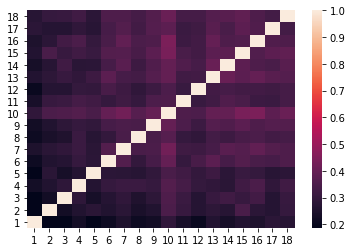

In [90]:
sns.heatmap(np.flip(rbf_vals, 1), xticklabels=range(1, 18+1), yticklabels=range(18, 0, -1));

In [121]:
print(lin_vals)

[[1.         0.98248242 0.96114412 0.95121319 0.90460212 0.71041576
  0.47315452 0.38221755 0.31722107 0.27903575 0.25892686 0.24506719]
 [0.98248242 1.         0.99294096 0.98335407 0.95183908 0.75358897
  0.50744447 0.41371993 0.34471121 0.30324662 0.28150918 0.26641857]
 [0.96114412 0.99294096 1.         0.99445655 0.96767089 0.76605118
  0.51650029 0.42217762 0.3524165  0.31063183 0.28872567 0.27348558]
 [0.95121319 0.98335407 0.99445655 1.         0.97601547 0.78270474
  0.53881083 0.44590866 0.37730722 0.33579883 0.31386207 0.29857912]
 [0.90460212 0.95183908 0.96767089 0.97601547 1.         0.86372819
  0.64402416 0.55500195 0.48563069 0.44082381 0.41642609 0.39986809]
 [0.71041576 0.75358897 0.76605118 0.78270474 0.86372819 1.
  0.91641715 0.85514805 0.80074403 0.7619774  0.73903904 0.72382307]
 [0.47315452 0.50744447 0.51650029 0.53881083 0.64402416 0.91641715
  1.         0.98668085 0.96352048 0.94102505 0.92561751 0.91487866]
 [0.38221755 0.41371993 0.42217762 0.44590866 0.5

In [114]:
print(lin_vals)

[[1.         0.98822128 0.96864577 0.94506764 0.84834738 0.58058964
  0.38203942 0.30834932 0.27336096 0.25623951 0.2498741  0.24393084]
 [0.98822128 1.         0.98886123 0.96045117 0.87905716 0.61475402
  0.41201909 0.33673577 0.30072946 0.28261005 0.27595218 0.26954692]
 [0.96864577 0.98886123 1.         0.9828193  0.90749149 0.63409695
  0.42791082 0.35237271 0.31687092 0.29899749 0.29216579 0.28537392]
 [0.94506764 0.96045117 0.9828193  1.         0.93184827 0.66351566
  0.46338771 0.3904026  0.3567184  0.33894004 0.33143854 0.32377679]
 [0.84834738 0.87905716 0.90749149 0.93184827 1.         0.83521269
  0.66546147 0.5968039  0.55941694 0.53621035 0.52402475 0.51286493]
 [0.58058964 0.61475402 0.63409695 0.66351566 0.83521269 1.
  0.94082216 0.89526446 0.86034934 0.83374846 0.81842072 0.80571088]
 [0.38203942 0.41201909 0.42791082 0.46338771 0.66546147 0.94082216
  1.         0.9877828  0.96883966 0.94919752 0.9360177  0.92503854]
 [0.30834932 0.33673577 0.35237271 0.3904026  0.5

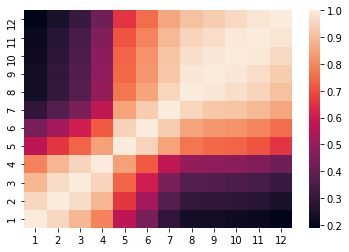

In [26]:
# Random
sns.heatmap(np.flip(lin_vals, 1), xticklabels=range(1, 12+1), yticklabels=range(12, 0, -1));

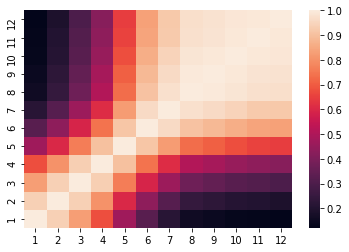

In [33]:
# Core set
sns.heatmap(np.flip(lin_vals, 1), xticklabels=range(1, 12+1), yticklabels=range(12, 0, -1));

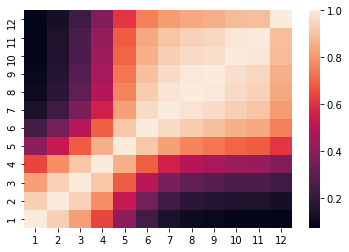

In [38]:
# Entropy
sns.heatmap(np.flip(lin_vals, 1), xticklabels=range(1, 12+1), yticklabels=range(12, 0, -1));

(200.0, 1000.0)

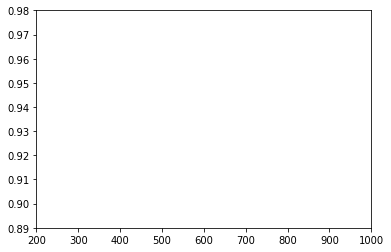

In [9]:
g = sns.lineplot(
    data=df_tr[df_tr.index.get_level_values("mode") == "long-besov"],
    x="labeled",
    y="f1_micro",
    hue="sampler",
    style="sampler",
    markers=True,
    dashes=False,
    ci=95,
    linewidth=3,
)
g.set_ylim(0.89, 0.98)
g.set_xlim(200, 1000)

In [7]:
g = sns.lineplot(
    data=df_tr[df_tr.index.get_level_values("mode") == "ada-besov"],
    x="labeled",
    y="f1_micro",
    hue="sampler",
    style="sampler",
    markers=True,
    dashes=False,
    ci=95,
    linewidth=3,
)
# g.set_ylim(0.82, 0.92)
# g.set_xlim(500, 1000)

ValueError: Could not interpret value `acuraccy` for parameter `y`

In [57]:
from transformers import AutoAdapterModel, AdapterConfig
from datasets import load_dataset

d = load_dataset("glue", "qqp")


# def save_dataset(hfd, name):
#     hfd["train"].to_pandas()[["question1", "question2", "label"]].sample(
#         5_000
#     ).reset_index(drop=True).to_csv(f"data/{name}/train.csv", header=False)
#     hfd["test"].to_pandas()[["question1", "question2", "label"]].sample(
#         2_000
#     ).reset_index(drop=True).to_csv(f"data/{name}/test.csv", header=False)
#     hfd["validation"].to_pandas()[["question1", "question2", "label"]].sample(
#         1_000
#     ).reset_index(drop=True).to_csv(f"data/{name}/validation.csv", header=False)


# save_dataset(d, "QQP")

In [8]:
model = AutoAdapterModel.from_pretrained("bert-base-uncased")
a = model.load_adapter("adapters/TREC-2-BERT-pfeiffer")
model.add_classification_head("head", num_labels=2)
model.add_adapter("head")
model.train_adapter("head")

In [37]:
from datasets import load_dataset
d = load_dataset("glue", "cola")

Reusing dataset glue (/home/jjukic/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [103]:
filt

labeled  train_loss  \
dataset model mode      sampler experiment al_iter                        
SUBJ    BERT  ada       entropy 0          0            100    0.003286   
                                           1            150    0.027270   
                                           2            200    0.013350   
                                           3            250    0.109074   
                                           4            300    0.016562   
...                                                     ...         ...   
              ada-besov dal     0          14           800    0.157853   
                                           15           850    0.015088   
                                           16           900    0.040000   
                                           17           950    0.060457   
                                           18          1000    0.060517   

                                                    test_accuracy  f1_micro  \
dataset model mode      sampler experiment al_iter                            
SUBJ    BERT  ada       entropy 0          0               0.9240    0.9240   
                                           1               0.9335    0.9335   
                                           2               0.9450    0.9450   
                                           3               0.9435    0.9435   
                                           4               0.9305    0.9305   
...                                                           ...       ...   
              ada-besov dal     0          14              0.9495    0.9495   
                                           15              0.9480    0.9480   
                                           16              0.9465    0.9465   
                                           17              0.9460    0.9460   
                                           18              0.9480    0.9480   

                                                    f1_macro  \
dataset model mode      sampler experiment al_iter             
SUBJ    BERT  ada       entropy 0          0        0.923932   
                                           1        0.933425   
                                           2        0.944954   
                                           3        0.943469   
                                           4        0.930201   
...                                                      ...   
              ada-besov dal     0          14       0.949481   
                                           15       0.947985   
                                           16       0.946468   
                                           17       0.945951   
                                           18       0.947991   

                                                                                             selected  
dataset model mode      sampler experiment al_iter                                                     
SUBJ    BERT  ada       entropy 0          0        [2305, 4388, 1686, 4945, 4197, 1651, 1528, 634...  
                                           1        [3930, 1150, 3054, 4473, 4050, 6840, 789, 644,...  
                                           2        [5674, 3296, 6446, 2828, 6228, 4870, 2445, 603...  
                                           3        [95, 4705, 6814, 1339, 2672, 5332, 1333, 2949,...  
                                           4        [3798, 142, 1298, 4842, 2021, 2910, 1488, 3058...  
...                                                                                               ...  
              ada-besov dal     0          14       [2396, 899, 4752, 5165, 2337, 5583, 5158, 4162...  
                                           15       [6091, 4028, 5942, 754, 6482, 2384, 6571, 5384...  
                                           16       [6760, 5142, 4128, 3680, 4473, 4266, 581, 2427...  
                                           17       [4490, 256, 4214, 5

In [60]:
filt = df_tr[df_tr.index.get_level_values("experiment") == 0]
grouped = filt.groupby(["dataset", "model", "mode", "sampler"]).agg(list)
grouped["subsample"] = grouped.selected.apply(lambda x: np.array(x[1:]).ravel())
grouped = grouped[grouped.index.get_level_values("mode") == "ada-besov"]
grouped

labeled  \
dataset model mode      sampler                                                              
COLA    BERT  ada-besov core_set         [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                        dal              [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                        entropy          [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                        entropy_dropout  [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                        random           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   

                                                                                train_loss  \
dataset model mode      sampler                                                              
COLA    BERT  ada-besov core_set         [0.5263520777225494, 0.5369085192680358, 0.001...   
                        dal              [0.5263520777225494, 0.34945824146270754, 0.53...   
                        entropy          [0.5263520777225494, 0.031123188603669406, 0.0...   
                        entropy_dropout  [0.5263520777225494, 0.5394955456256867, 0.553...   
                        random           [0.5263520777225494, 0.46693688035011294, 0.26...   

                                                                             test_accuracy  \
dataset model mode      sampler                                                              
COLA    BERT  ada-besov core_set         [0.6912751677852349, 0.6931927133269415, 0.695...   
                        dal              [0.6912751677852349, 0.6941514860977949, 0.691...   
                        entropy          [0.6912751677852349, 0.6931927133269415, 0.699...   
                        entropy_dropout  [0.6912751677852349, 0.6912751677852349, 0.693...   
                        random           [0.6912751677852349, 0.6931927133269415, 0.698...   

                                                                                  f1_micro  \
dataset model mode      sampler                                                              
COLA    BERT  ada-besov core_set         [0.6912751677852349, 0.6931927133269415, 0.695...   
                        dal              [0.6912751677852349, 0.6941514860977949, 0.691...   
                        entropy          [0.6912751677852349, 0.6931927133269415, 0.699...   
                        entropy_dropout  [0.6912751677852349, 0.6912751677852349, 0.693...   
                        random           [0.6912751677852349, 0.6931927133269415, 0.698...   

                                                                                  f1_macro  \
dataset model mode      sampler                                                              
COLA    BERT  ada-besov core_set         [0.4087301587301587, 0.45069124423963136, 0.52...   
                        dal              [0.4087301587301587, 0.4434765300268128, 0.408...   
                        entropy          [0.4087301587301587, 0.49340036185688435, 0.54...   
                        entropy_dropout  [0.4087301587301587, 0.41171298047953364, 0.41...   
                        random           [0.4087301587301587, 0.4377737349235227, 0.508...   

                                                                                  selected  \
dataset model mode      sampler                                                              
COLA    BERT  ada-besov core_set         [[8231, 3747, 4269, 5631, 1945, 2319, 397, 315...   
                        dal              [[8231, 3747, 4269, 5631, 1945, 2319, 397, 315...   
                        entropy          [[8231, 3747, 4269, 5631, 1945, 2319, 397, 315...   
                        entropy_dropout  [[8231, 3747, 4269, 5631, 1945, 2319, 397, 315...   
                        random           [[8231, 3747, 4269, 5631, 1945, 2319, 397, 315...   

                                                                                 subsample  
dataset model mode      sampler     

In [146]:
sampler = "random"
df_i = maj_df[(maj_df.sampler==sampler)]
df_i[df_i.forgetfulness==1].pvi

6165    0.986709
521     1.012730
549     0.986849
1202    0.151575
3977    0.986847
2740    0.986856
1147    0.986786
4501    1.013089
6035    1.012707
2966   -9.133169
3435    1.009307
1410    0.985960
313     1.013238
4190    1.013241
6053    0.961839
5071    0.986864
3825    1.013227
2816    1.012418
5332    0.986841
5563    0.909505
1402    0.986689
2132    0.986845
5651    0.986851
6235    0.986832
3785    0.986646
373     1.013114
2290    0.986717
1396    0.986862
1602    0.986829
4129    1.013235
1279    0.986163
5638    0.939564
5188    1.013167
3719    0.518692
239     1.013236
1080    0.986765
6219    0.986837
3732    0.986857
5641    0.986562
3177    0.986848
3540    1.008838
229    -9.642583
987     0.984621
4214    1.013194
4113    0.986840
4394    0.986834
6321    0.986850
1093    0.986610
6017    0.986680
1643    1.012312
1789    0.986861
5979    1.012984
2913    0.925483
5164    1.012201
4166    1.013243
2625    1.013203
980     0.986664
319     1.013184
2485    0.9757

In [140]:
d = df_i[df_i.forgetfulness==2]
# d[d.pvi < 0]
d

,correctness,confidence,variability,forgetfulness,threshold_closeness,pvi,text,label,type,sampler
1475,17,0.844087,0.295359,2,0.131604,1.013235,is life a series of uncontrollable events that...,objective,M,entropy
3,17,0.863309,0.268679,2,0.118007,1.013234,showing this beautiful city as seen through th...,objective,M,entropy
6707,18,0.832672,0.271331,2,0.139329,-0.849927,"in this vivid , emotionally complex ensemble p...",subjective,E,entropy
508,17,0.770754,0.248188,2,0.176692,0.986356,". . . with "" the bourne identity "" we return ...",subjective,M,entropy
1930,16,0.829752,0.305369,2,0.141264,1.013243,"capitalizing on his fame as the star of "" hoga...",objective,M,entropy
...,...,...,...,...,...,...,...,...,...,...
4941,17,0.829025,0.256406,2,0.141743,0.986773,the animated subplot keenly depicts the inner ...,subjective,M,entropy
1251,18,0.867831,0.208241,2,0.114700,0.985474,"a full experience , a love story and a murder ...",subjective,E,entropy
511,15,0.796976,0.301658,2,0.161806,1.013214,john has become not just a full fledged phenom...,objective,M,entropy
3901,12,0.604527,0.469929,2,0.239074,0.986836,russian ark is a new treasure of the hermitage .,subjective,H,entropy


In [147]:
df_i["correct"] = df_i.correctness

<ipython-input-147-1dd16cd21e0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i["correct"] = df_i.correctness


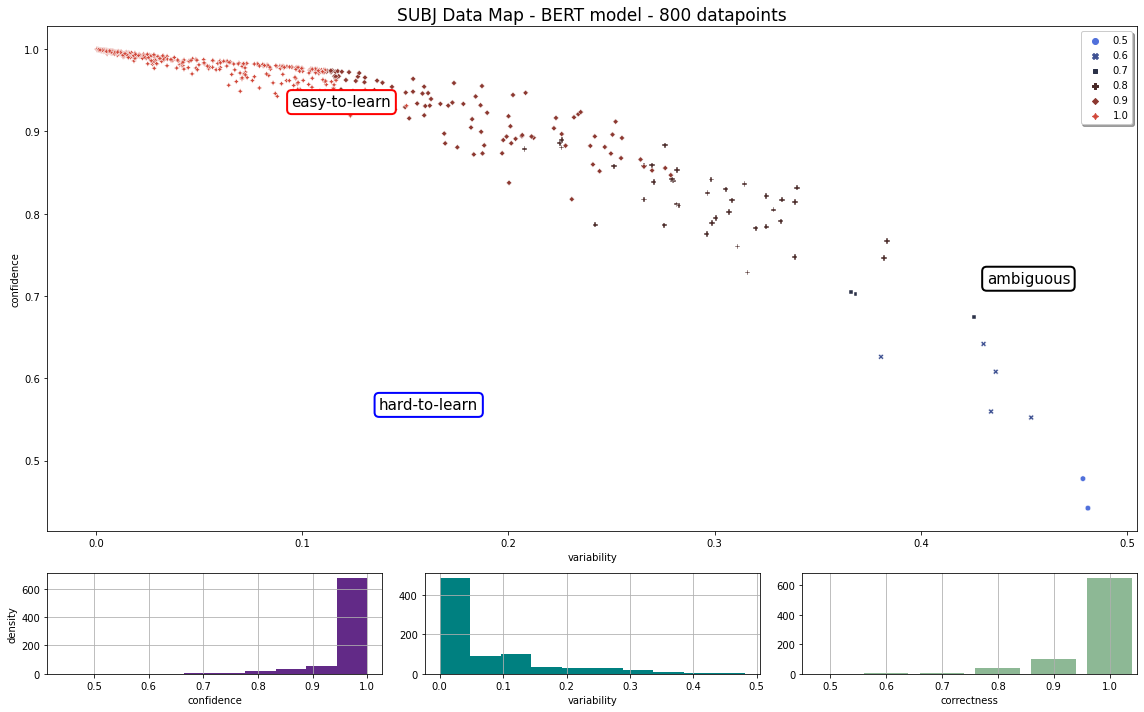

In [148]:
scatter_it(df_i, meta={"dataset": "SUBJ", "model": "BERT"});

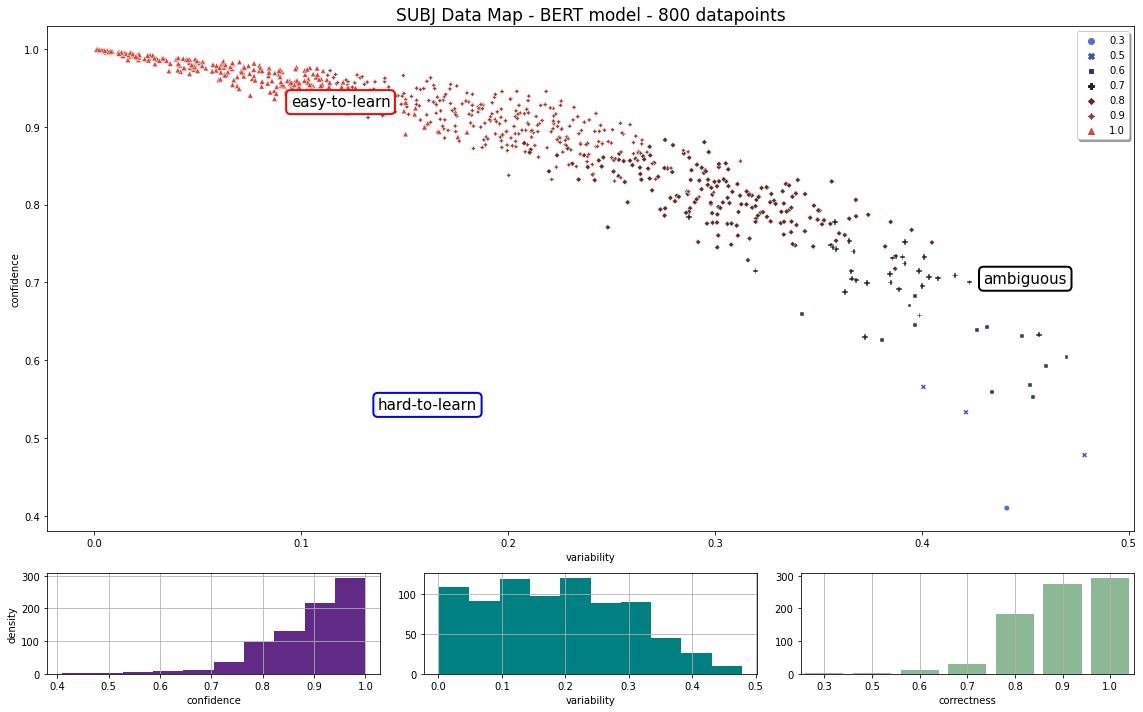

In [145]:
scatter_it(df_i, meta={"dataset": "SUBJ", "model": "BERT"});

<AxesSubplot:>

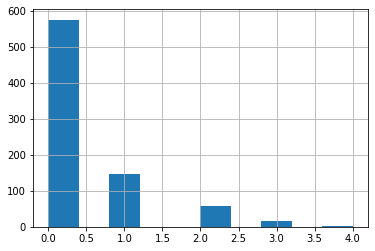

In [119]:
maj_df[(maj_df.sampler=="dal")].forgetfulness.hist()

<AxesSubplot:>

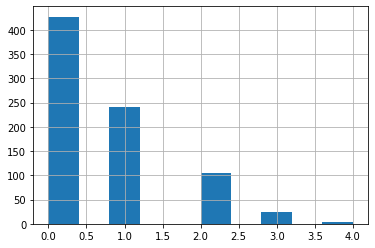

In [120]:
maj_df[(maj_df.sampler=="entropy")].forgetfulness.hist()

<AxesSubplot:>

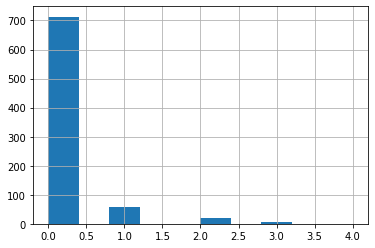

In [121]:
maj_df[(maj_df.sampler=="random")].forgetfulness.hist()

In [50]:
maj_df[(maj_df.sampler=="entropy_dropout")].forgetfulness.value_counts()

0       542
1       219
2        92
3        34
4         9
5         3
1000      1
Name: forgetfulness, dtype: int64

In [51]:
df = maj_df[(maj_df.sampler=="entropy_dropout")]
df = df[df.forgetfulness < 10]

<AxesSubplot:>

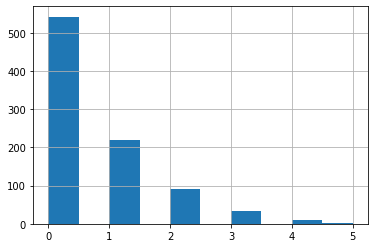

In [53]:
df.forgetfulness.hist()

In [61]:
def get_type(x):
    x = x / 20
    if x < 0.5:
        return "I"
    if x < 0.75:
        return "H"
    if x < 0.9:
        return "M"
    return "E"
    

df["type"] = df.correctness.apply(lambda x: get_type(x))

dfs = []
for index, row in grouped.iterrows():
    sampler = index[3]
    print(sampler)
    indices = row["subsample"]
    df_sampler = df.loc[indices]
    df_sampler["sampler"] = sampler
    dfs.append(df_sampler)
#     g = sns.histplot(data=df_sampler, x="pvi", linewidth=3, hue="sampler")

maj_df = pd.concat(dfs)




core_set
dal
entropy
entropy_dropout
random


In [275]:
ed = maj_df[maj_df.sampler=="random"]
indices = ed.index.tolist()

In [251]:
in

,correctness,confidence,variability,forgetfulness,threshold_closeness,pvi,text,label,type,sampler
4022,18,0.874810,0.275991,0,0.109518,2.095959,What were millions of kids wearing on their he...,1,E,entropy_dropout
3891,19,0.905251,0.193326,1,0.085771,1.693314,What was the worst hurricane ?,1,E,entropy_dropout
1695,19,0.944441,0.183099,0,0.052472,2.692248,What is George Lucas 's e-mail address ?,5,E,entropy_dropout
3820,18,0.853758,0.291852,0,0.124855,2.229052,"What was the claim to fame of Explorer I , lau...",0,E,entropy_dropout
1854,18,0.870147,0.279845,1,0.112991,2.689060,What is the US Federal Government website for ...,5,E,entropy_dropout
...,...,...,...,...,...,...,...,...,...,...
4563,20,0.985462,0.057802,0,0.014327,2.098110,What soft drink held a national flavor poll in...,1,E,random
1170,19,0.948653,0.178335,0,0.048710,2.096786,What animals did The Amazing Three masquerade ...,1,E,random
3120,19,0.856379,0.177757,1,0.122994,2.229073,What is Doegs ?,0,E,random
10,19,0.953862,0.186484,0,0.044009,2.229162,Why do heavier objects travel downhill faster ?,0,E,random


In [253]:
ed.forgetfulness.value_counts()

0    529
1    224
2    101
3     34
4      8
5      4
Name: forgetfulness, dtype: int64

In [240]:
ed

,correctness,confidence,variability,forgetfulness,threshold_closeness,pvi,text,label,type,sampler
1913,8,0.436788,0.444790,0,0.246004,5.948780,What is a `` USB '' port on a computer ?,2,I,entropy_dropout
1084,20,0.824912,0.216025,0,0.144432,-5.816174,What are the first ten amendements passed ?,1,E,entropy_dropout
4490,19,0.929165,0.188109,0,0.065817,2.229171,Define Spumante .,0,E,entropy_dropout
1422,16,0.766630,0.333335,0,0.178909,2.000518,What do I call the sons and daughters of my fi...,1,M,entropy_dropout
4211,20,0.890942,0.155913,0,0.097164,2.228311,What are binomial coefficients ?,0,E,entropy_dropout
...,...,...,...,...,...,...,...,...,...,...
561,19,0.943782,0.182189,0,0.053057,0.637476,What do flatfish eat ?,1,E,entropy_dropout
5,18,0.841387,0.283630,1,0.133455,2.123653,What contemptible scoundrel stole the cork fro...,3,E,entropy_dropout
1771,20,0.948281,0.152844,0,0.049044,2.093957,What 's another name for aspartame ?,1,E,entropy_dropout
4168,18,0.900704,0.235292,0,0.089436,2.098096,What does a chef coddle eggs in ?,1,E,entropy_dropout


In [166]:
maj_df["imp"] = maj_df.confidence * maj_df.variability

AttributeError: 'Series' object has no attribute 'count_values'

In [26]:
maj_df[maj_df.sampler == "random"].type.value_counts()

E    657
M    139
H      4
Name: type, dtype: int64

In [27]:
maj_df[maj_df.sampler == "entropy_dropout"].type.value_counts()

E    659
M    136
H      3
I      2
Name: type, dtype: int64

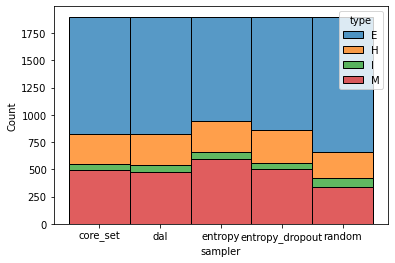

In [62]:
g = sns.histplot(data=maj_df, x="sampler", hue="type", multiple="stack")
# g.set_xlim((-8, 0))
# g.set_ylim((0, 10))

In [154]:
maj_df[maj_df.sampler == "random"].type.value_counts()

E    775
M    182
H     43
Name: type, dtype: int64

In [152]:
maj_df[maj_df.sampler == "entropy"].type.value_counts()

E    739
M    226
H     33
I      2
Name: type, dtype: int64

<AxesSubplot:xlabel='forgetfulness', ylabel='Count'>

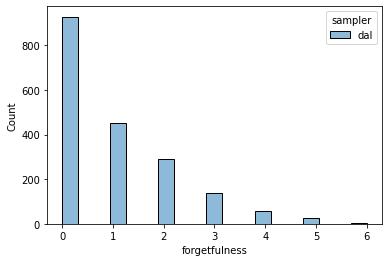

In [65]:
sns.histplot(data=maj_df[(maj_df.sampler == "dal") & (maj_df.forgetfulness < 1000)], x="forgetfulness", hue="sampler")

In [164]:
d = maj_df[maj_df.sampler == "entropy"]
d.sort_values("forgetfulness")[-20:]

,correctness,confidence,variability,forgetfulness,threshold_closeness,pvi,text,label,type,sampler
4216,11,0.590434,0.318435,5,0.241822,-3.341225,The committee has all now resigned.,0,H,entropy
755,15,0.703591,0.280328,5,0.208551,0.504477,They represented Mary seriously to the dean as...,1,M,entropy
1825,9,0.475841,0.316549,5,0.249416,0.399537,"I said that my father, he was tight as an owl.",1,I,entropy
5285,14,0.665640,0.260819,5,0.222563,0.115586,How likely to win is he?,1,H,entropy
7608,8,0.402739,0.355467,5,0.240540,1.756632,Whom left Bill.,0,I,entropy
7649,15,0.700617,0.290723,5,0.209753,0.320450,for John to hurt himself is stupid.,1,M,entropy
6477,13,0.603425,0.356849,5,0.239303,0.502094,Those days Bill offered Mary anything he cooked.,1,H,entropy
1833,12,0.527580,0.243685,5,0.249239,0.413335,"My father, that he's lived here all his life i...",1,H,entropy
5389,14,0.608003,0.275256,5,0.238335,-1.813283,She has enough problems as it is.,1,H,entropy
7559,8,0.374484,0.300274,5,0.234246,1.663690,Bill likes herself.,0,I,entropy


In [161]:
df.type.value_counts()

E    7165
M    1028
H     287
I      71
Name: type, dtype: int64

In [142]:
df.type.value_counts()

E    6763
M    1476
H     275
I      37
Name: type, dtype: int64

In [56]:
df = pd.read_csv("stats/BERT-COLA-unipelt.csv", index_col=0)

In [57]:
df_text = pd.read_csv("data/GLUE/COLA/train.csv", header=None, index_col=0)
df["text"] = df_text[1].tolist()
df["label"] = df_text[2].tolist()

In [39]:
df.forgetfulness.value_counts()

0       4213
1        440
2        158
3         48
4         13
5          5
1000       4
Name: forgetfulness, dtype: int64

In [45]:
df.sort_values("pvi")[:20]

,correctness,confidence,variability,forgetfulness,threshold_closeness,pvi,text,label
3682,16,0.811639,0.317809,1,0.152881,-12.560358,but peter is reclusive and awkward when he doe...,objective
3700,17,0.838344,0.270436,2,0.135524,-11.975046,and some of these ghosts are down right unfrie...,objective
2055,20,0.941082,0.145520,0,0.055447,-10.802717,"lead of the group is arrogant bruce banner , m...",objective
229,19,0.914973,0.182385,1,0.077797,-9.642583,"ever notice the similarities between steve "" t...",objective
2449,20,0.995870,0.009454,0,0.004113,-9.564806,"carlton "" niche "" james ( cory barlog ) tries ...",objective
2966,18,0.859903,0.240973,1,0.120470,-9.133169,those who loved graham yesterday shouldn't cou...,objective
182,19,0.855249,0.238159,1,0.123798,-8.159325,neither of them seem able to disrupt or end th...,objective
5806,17,0.857685,0.253499,3,0.122062,-7.258680,what about charlotte : can pally let his heart...,objective
2683,20,0.950073,0.126145,0,0.047434,-6.473686,peckerhead try to brainwash all the gays into ...,objective
4558,18,0.901862,0.244702,0,0.088507,-5.963236,"otis wants to relive the old days , mark doesn...",objective


In [104]:
maj_df[maj_df.sampler == "entropy"].pvi

1475    1.013235
3       1.013234
3725    1.013193
6073    1.013177
2768    0.986857
          ...   
6829    1.013242
2707    0.986793
4922    0.986847
1549    1.012873
3510    0.986838
Name: pvi, Length: 800, dtype: float64

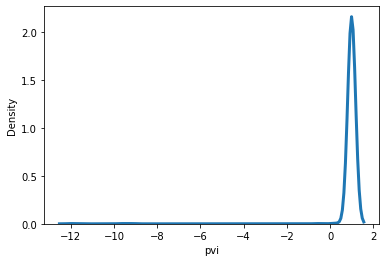

In [99]:
g = sns.kdeplot(data=maj_df[maj_df.sampler == "random"], x="pvi", linewidth=3)

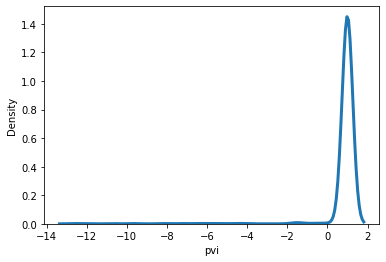

In [101]:
g = sns.kdeplot(data=maj_df[maj_df.sampler == "entropy"], x="pvi", linewidth=3)

In [26]:
from cleanlab.classification import CleanLearning
from cleanlab.filter import find_label_issues

# # Option 1 - works with sklearn-compatible models - just input the data and labels ツ
# label_issues_info = CleanLearning(clf=sklearn_compatible_model).find_label_issues(data, labels)

# # Option 2 - works with ANY ML model - just input the model's predicted probabilities
# ordered_label_issues = find_label_issues(
#     labels=labels,
#     pred_probs=pred_probs,  # predicted probabilities from any model (ideally out-of-sample predictions)
#     return_indices_ranked_by='self_confidence',
# )

In [21]:
train_eval = make_iterable(
    train,
    device,
    batch_size=args.batch_size,
)

In [33]:
eval_result_dict, probs, labels = evaluate_model(model=model, tokenizer=tokenizer, data=train_eval)

[Accuracy]: 4823/500 : 964.600%onds
[F1-micro]: 0.988
[F1-macro]: 0.975
[[1117    0   13    0   10    0]
 [   3 1116    1    0    0    0]
 [   6    0 1026    1    2    6]
 [   1    2    3  748    1    0]
 [   0    0    0    0  748    0]
 [   2    0    7    0    0   68]]


In [34]:
ordered_label_issues = find_label_issues(
    labels=labels.numpy(),
    pred_probs=probs.cpu().numpy(),  # predicted probabilities from any model (ideally out-of-sample predictions)
    return_indices_ranked_by='self_confidence',
)

In [37]:
train[ordered_label_issues].examples

[Example({
     id: (None, 1694),
     text: (None, ['what', 'is', 'the', 'largest', 'variety', 'of', 'cactus', '?']),
     label: (None, 0)
 }),
 Example({
     id: (None, 2501),
     text: (None, ['how', 'do', 'you', 'say', ',', '`', '`', 'i', 'love', 'you', "'", "'", 'in', 'other', 'languages', '?']),
     label: (None, 1)
 }),
 Example({
     id: (None, 1704),
     text: (None, ['what', 'is', 'the', 'connection', 'between', 'new', 'k', '##ry', '##pton', 'and', 'dax', '##am', '?']),
     label: (None, 1)
 }),
 Example({
     id: (None, 479),
     text: (None, ['how', 'do', 'you', 'say', '`', '`', 'fresh', "'", "'", 'in', 'spanish', '?']),
     label: (None, 1)
 }),
 Example({
     id: (None, 4038),
     text: (None, ['how', 'do', 'you', 'say', '`', '`', 'eat', 'the', 'day', "'", "'", 'in', 'latin', '?']),
     label: (None, 1)
 }),
 Example({
     id: (None, 648),
     text: (None, ['how', 'do', 'you', 'say', 'i', 'love', 'you', 'in', 'spanish', '?']),
     label: (None, 1)
 }),
 Ex

In [39]:
from cleanlab.dataset import health_summary

health_summary(labels.numpy(), probs.cpu().numpy(), class_names=["0", "1", "2", "3", "4", "5"])

----------------------------------------------------------
|  Generating a Cleanlab Dataset Health Summary          |
|   for your dataset with 4,881 examples and 6 classes.  |
|  Note, Cleanlab is not a medical doctor... yet.        |
----------------------------------------------------------

Overall Class Quality and Noise across your dataset (below)
------------------------------------------------------------ 



,Class Name,Class Index,Label Issues,Inverse Label Issues,Label Noise,Inverse Label Noise,Label Quality Score
0,2,2,7,7,0.006724,0.006724,0.993276
1,0,0,7,3,0.006140,0.002641,0.993860
2,1,1,0,0,0.000000,0.000000,1.000000
3,3,3,0,0,0.000000,0.000000,1.000000
4,4,4,0,0,0.000000,0.000000,1.000000
5,5,5,0,4,0.000000,0.049383,1.000000



Class Overlap. In some cases, you may want to merge classes in the top rows (below)
-----------------------------------------------------------------------------------



,Class Name A,Class Name B,Class Index A,Class Index B,Num Overlapping Examples,Joint Probability
0,0,2,0,2,10,0.002049
1,2,5,2,5,4,0.000820
2,0,1,0,1,0,0.000000
3,0,3,0,3,0,0.000000
4,0,4,0,4,0,0.000000
5,0,5,0,5,0,0.000000
6,1,2,1,2,0,0.000000
7,1,3,1,3,0,0.000000
8,1,4,1,4,0,0.000000
9,1,5,1,5,0,0.000000



 * Overall, about 0% (14 of the 4,881) labels in your dataset have potential issues.
 ** The overall label health score for this dataset is: 1.00.

Generated with <3 from Cleanlab.



{'overall_label_health_score': 0.9971317353001435,
 'joint': array([[0.23212456, 0.        , 0.00143413, 0.        , 0.        ,
         0.        ],
        [0.        , 0.22946118, 0.        , 0.        , 0.        ,
         0.        ],
        [0.00061463, 0.        , 0.21184184, 0.        , 0.        ,
         0.0008195 ],
        [0.        , 0.        , 0.        , 0.15468142, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.15324729,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.01577546]]),
 'classes_by_label_quality':   Class Name  Class Index  Label Issues  Inverse Label Issues  Label Noise  \
 0          2            2             7                     7     0.006724   
 1          0            0             7                     3     0.006140   
 2          1            1             0                     0     0.000000   
 3          3            3             0        

In [60]:
from cleanlab.outlier import OutOfDistribution

ood = OutOfDistribution()

# To get outlier scores for train_data using predicted class probabilities (from a trained classifier) and given class labels
ood_train_predictions_scores = ood.fit_score(pred_probs=probs.cpu().numpy(), labels=labels.numpy())

# To get outlier scores for additional test_data using predicted class probabilities
# ood_test_predictions_scores = ood.score(pred_probs=test_pred_probs)

Fitting OOD estimator based on provided pred_probs ...


In [66]:
ind = np.argpartition(ood_train_predictions_scores, -30)[-30:]

In [67]:
train[ind].examples

[Example({
     id: (None, 668),
     text: (None, ['what', 'is', 'the', 'abbreviated', 'expression', 'for', 'the', 'national', 'bureau', 'of', 'investigation', '?']),
     label: (None, 2)
 }),
 Example({
     id: (None, 3959),
     text: (None, ['what', 'does', 's', '##na', '##fu', 'stand', 'for', '?']),
     label: (None, 2)
 }),
 Example({
     id: (None, 2085),
     text: (None, ['what', 'does', 'the', '`', '`', 'c', "'", "'", 'stand', 'for', 'in', 'the', 'equation', 'e', '=', 'mc', '##2', '?']),
     label: (None, 2)
 }),
 Example({
     id: (None, 30),
     text: (None, ['what', 'does', 'the', 'abbreviation', 'aids', 'stand', 'for', '?']),
     label: (None, 2)
 }),
 Example({
     id: (None, 1396),
     text: (None, ['what', 'does', 'e', '.', 'g', '.', 'stand', 'for', '?']),
     label: (None, 2)
 }),
 Example({
     id: (None, 518),
     text: (None, ['what', 'does', 'sid', '##s', 'stand', 'for', '?']),
     label: (None, 2)
 }),
 Example({
     id: (None, 1349),
     text: (N